In [1]:
import os, sys, pickle

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import scipy, math
from scipy import stats
import jp_mpl as jplot

import ROOT
import ntuple_tools
reload(ntuple_tools)

<module 'ntuple_tools' from '/home/jpyanez/snoplus/snoplus_python/ntuple_tools.pyc'>

In [2]:
data_dir = '/home/jpyanez/scratch/snoplus/analysis_water_analysis_tbin6_ntuple'
pmt_dir = '/home/jpyanez/scratch/snoplus/analysis_water_mc_tl208pmt_tbin6_ntuple'
in_dir = '/home/jpyanez/scratch/snoplus/analysis_water_mc_bi214_tbin6_ntuple'

data_dirfull = '/home/jpyanez/scratch/snoplus/analysisHeavy_water_analysis_tbin6_ntuple'
pmt_dirfull = '/home/jpyanez/scratch/snoplus/analysisHeavy_water_mc_tl208pmt_tbin6_ntuple'
in_dirfull = '/home/jpyanez/scratch/snoplus/analysisHeavy_water_mc_bi214_tbin6_ntuple'

In [3]:
max_files = 2000
#use_dir = data_dir
#outdir = '/home/jpyanez/scratch/snoplus/npy_data'
#use_dir = pmt_dir
#outdir = '/home/jpyanez/scratch/snoplus/npy_pmt'
#use_dir = in_dir
#outdir = '/home/jpyanez/scratch/snoplus/npy_inner'
#use_dir = in_dirfull
#outdir  = '/home/jpyanez/scratch/snoplus/npy_innerFull'
use_dir = pmt_dirfull
outdir  = '/home/jpyanez/scratch/snoplus/npy_pmtFull'

Going over  1178  files
Entries in file  421  - adding 20% contintengcy
0
400
800
Saved!
Diagnostics qpdtProbability
-0.00585955186354 1.0 0.295388535059


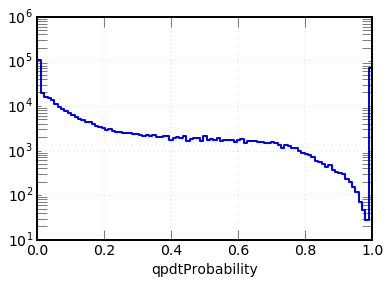

In [4]:
qpdtProbability = ntuple_tools.dumpArray(use_dir, 'qpdtProbability', 
              outdir = outdir, 
              show_info = True,
              max_files = max_files,
              ax_lim = [0, 1])

Going over  1178  files
Entries in file  421  - adding 20% contintengcy
0
400
800
Saved!
Diagnostics qpdtNhitsEarly
0.0 18.0 1.75692649315


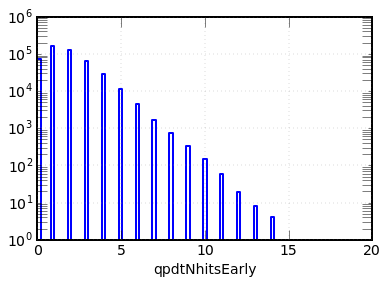

In [5]:
qpdtNhitsEarly =  ntuple_tools.dumpArray(use_dir, 'qpdtNhitsEarly', 
              outdir = outdir, 
              show_info = True,
              max_files = max_files,
              ax_lim = [0, 20])

Going over  1178  files
Entries in file  421  - adding 20% contintengcy
0
400
800
Saved!
Diagnostics nhitsCleaned
15.0 35.0 16.4726987262


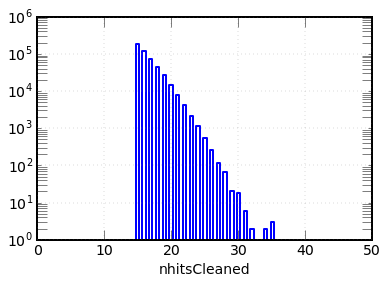

In [6]:
nhitsCleaned =  ntuple_tools.dumpArray(use_dir, 'nhitsCleaned', 
              outdir = outdir, 
              show_info = True,
              max_files = max_files,
              ax_lim = [0, 50])

Going over  1178  files
Entries in file  421  - adding 20% contintengcy
0
400
800
Saved!
Diagnostics itr
0.0 1.0 0.570235144891


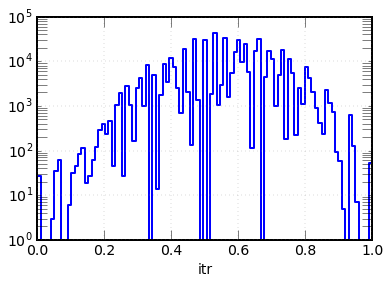

In [7]:
itr =  ntuple_tools.dumpArray(use_dir, 'itr', 
              outdir = outdir, 
              show_info = True,
              max_files = max_files,
              ax_lim = [0, 1])

Going over  1178  files
Entries in file  421  - adding 20% contintengcy
0
400
800
Saved!
Diagnostics energy
0.0576455106409 11.7899952259 1.63716645245


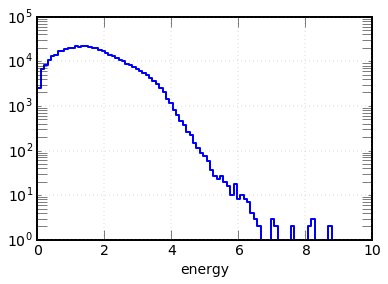

In [8]:
energy =  ntuple_tools.dumpArray(use_dir, 'energy', 
              outdir = outdir, 
              show_info = True,
              max_files = max_files,
              ax_lim = [0, 10])

Going over  1178  files
Entries in file  421  - adding 20% contintengcy
0
400
800
Saved!
Diagnostics posr
100.553625465 7999.98982878 6221.2607078


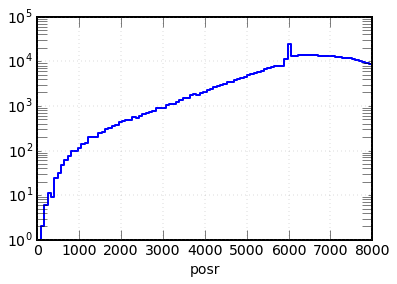

In [9]:
posr =  ntuple_tools.dumpArray(use_dir, 'posr', 
              outdir = outdir, 
              show_info = True,
              max_files = max_files,
              ax_lim = [0, 8000])

In [11]:
mybool = (energy>3.)*(posr<5500.)
print 'Events ', np.sum(mybool), ' - Efficiency ', np.sum(mybool)*1./len(mybool)

Events  251  - Efficiency  0.000531829238319


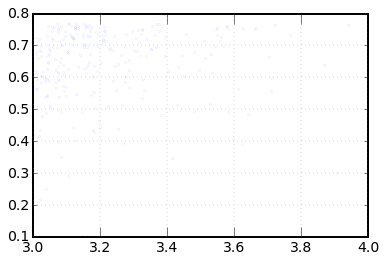

In [12]:
plt.plot(energy[mybool], posr[mybool]**3/6000.**3, '.', markersize=0.1)

Diagnostics QPDT Poisson CDF
2.02797923164e-06 0.795487615119 0.24577712469


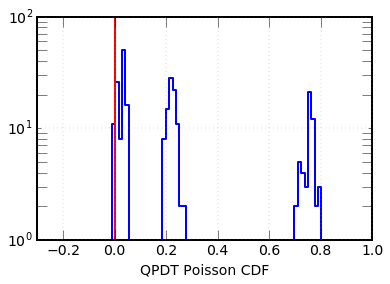

In [13]:
# Defined in 7.1 - 7.2 in LETA (0.0143 number from Tanner's study when changing QPDT)
qpdtpos = stats.poisson.pmf(qpdtNhitsEarly, nhitsCleaned*0.0143)
ax = ntuple_tools.arrayDiagnostics(qpdtpos[mybool], 'QPDT Poisson CDF', [-0.3, 1.])
plt.axvline(x=0.002, ymin = 0, ymax = 1, color='red')


Diagnostics QDPT PQcor
-0.0296431205382 1.0 0.206815876138


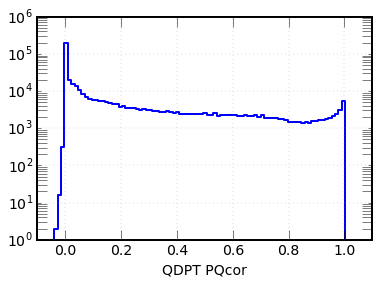

In [14]:
# Eq. 16.7 in LETA unidoc
pqcor = 1-(1-qpdtProbability)**qpdtNhitsEarly
ntuple_tools.arrayDiagnostics(pqcor, 'QDPT PQcor', [-0.1,1.1])

In [15]:
# QPDT cut variable (from 7.1, 7.2 in leta)
qpdt_pass = (qpdtNhitsEarly == 0) + ((pqcor > 0.01)*qpdtpos > 0.002)

In [16]:
print 'Passing fraction ', np.sum(qpdt_pass)*1./qpdt_pass.size

Passing fraction  0.592078498843


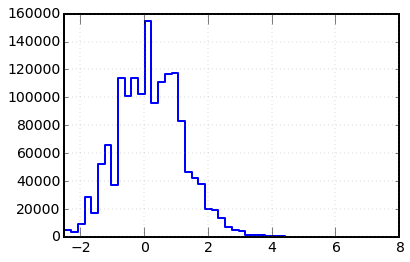

In [71]:
scaled_itr = (0.74-itr)*np.sqrt(nhitsCleaned)/0.43
xaxis = np.linspace(-2.5, 8, 51)
b, x = np.histogram(scaled_itr[itr>0], xaxis)
jplot.unfilledBar(x,b)

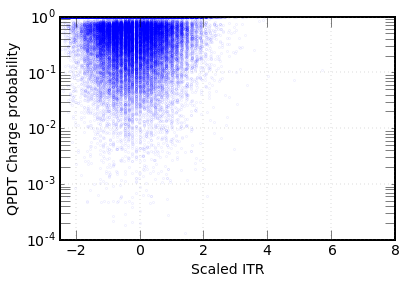

In [72]:
plt.plot(scaled_itr[mybool], 
         qpdtProbability[mybool], '.', markersize=0.1)
plt.xlim(-2.5, 8)
plt.ylim(1E-4, 1)
plt.yscale('log')
plt.xlabel('Scaled ITR')
plt.ylabel('QPDT Charge probability')

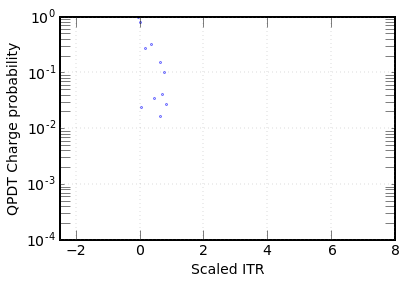

In [101]:
plt.plot(scaled_itr[mybool], 
         qpdtProbability[mybool], '.', markersize=1)
plt.xlim(-2.5, 8)
plt.ylim(1E-4, 1)
plt.yscale('log')
plt.xlabel('Scaled ITR')
plt.ylabel('QPDT Charge probability')

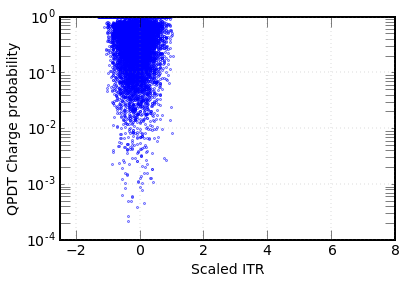

In [116]:
plt.plot(scaled_itr[mybool], 
         qpdtProbability[mybool], '.', markersize=1)
plt.xlim(-2.5, 8)
plt.ylim(1E-4, 1)
plt.yscale('log')
plt.xlabel('Scaled ITR')
plt.ylabel('QPDT Charge probability')

In [117]:
sitr = 4
myitr=1.
print 'Nhit ', (sitr*0.43/(0.74-myitr))**2

Nhit  43.7633136095
